In [1]:
library(dplyr)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [130]:
df <- read.csv(file = "C:\\Users\\Mayer\\Documents\\DataScience\\ML\\Kaggle\\train.csv")

In [155]:
test2 <- read.csv(file = "C:\\Users\\Mayer\\Documents\\DataScience\\ML\\Kaggle\\test.csv")

In [121]:
head(test2 )
dim (df)

,id,season,mnth,seasonality,holiday,weekday,workingday,weathersit,temp,atemp,...,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weathersit1,weathersit2,weathersit3,cnt
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,366,1,1,-1836.94,0,0,0,1,0.370000,0.375621,...,0,0,0,0,1,0,1,0,0,0
2,367,1,1,-1836.94,1,1,0,1,0.273043,0.252304,...,0,0,0,0,1,0,1,0,0,0
3,368,1,1,-1836.94,0,2,1,1,0.150000,0.126275,...,0,0,0,0,1,0,1,0,0,0
4,369,1,1,-1836.94,0,3,1,2,0.107500,0.119337,...,0,0,0,0,1,0,0,1,0,0
5,370,1,1,-1836.94,0,4,1,1,0.265833,0.278412,...,0,0,0,0,1,0,1,0,0,0
6,371,1,1,-1836.94,0,5,1,1,0.334167,0.340267,...,0,0,0,0,1,0,1,0,0,0


[1] 365  26

In [99]:
bike.time <- df %>% 
    mutate(year,mnth) %>%
    group_by(year,mnth) %>%
    summarise(n=n(),cnt_mean=mean(cnt,na.rm=T)) %>%
    select(year,mnth,n,cnt_mean)


bike.time$cnt_mean <- ifelse(is.na(bike.time$cnt_mean),0,bike.time$cnt_mean)

bike.ts <- ts(bike.time$cnt_mean, start = c(1999, 1), end=c(2000,12), frequency = 12)

ERROR: Error: object 'year' not found


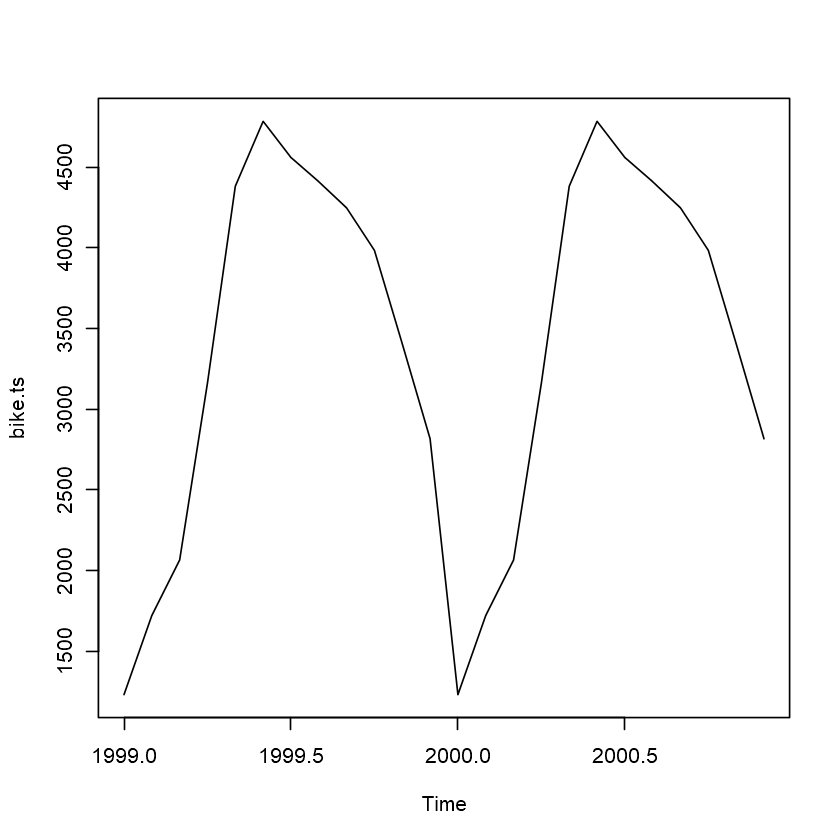

In [6]:
plot(bike.ts)

Warning message in plot.window(...):
"relative range of values (  24 * EPS) is small (axis 2)"


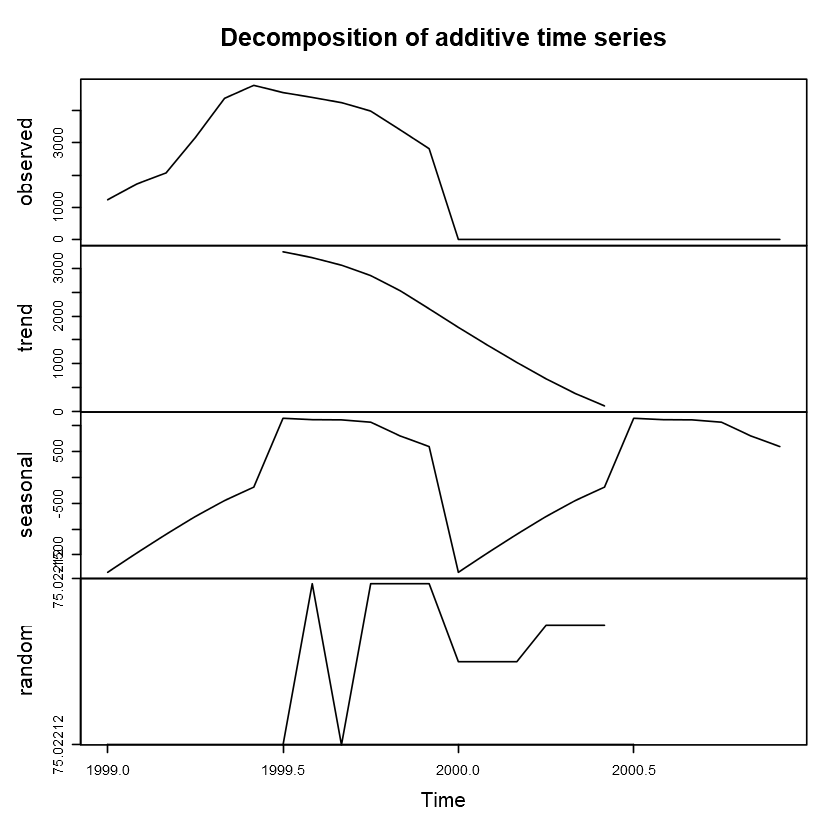

In [21]:
plot(decompose(bike.ts))

In [24]:
bike.dec <- decompose(bike.ts)
bike.dec$seasonal
montly_trend <- data.frame(month=c(1:12),season=bike.dec$seasonal[1:12]) # season=movie.dec$seasonal[1:12]) ts is matrix since we want only the first line we take the first 12 varibles 
montly_trend

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1999,-1836.9397,-1463.2408,-1102.5469,-759.5680,-451.6600,-192.3917,1138.2002,1111.2780,1106.9881,1061.7931,797.4530,590.6346
2000,-1836.9397,-1463.2408,-1102.5469,-759.5680,-451.6600,-192.3917,1138.2002,1111.2780,1106.9881,1061.7931,797.4530,590.6346


month,season
<int>,<dbl>
1,-1836.9397
2,-1463.2408
3,-1102.5469
4,-759.5680
5,-451.6600
6,-192.3917
7,1138.2002
8,1111.2780
9,1106.9881


# DATASET PARTITION

In [132]:
Table1 <- function (x=NULL, y=NULL, rn=NULL, data=NULL, miss=3, catmiss=TRUE, formatted=TRUE, categorize=FALSE,
                    factorVars=NULL, maxcat=10, delzero=TRUE, decimals=1, messages=TRUE, excel=0, excel_file=NULL) {
  ### define sub-functions
  options(warn=-1)
  Del <- NULL
  Pop <- NULL
  n <- NULL
  g1 <- function(var)c(Mean=mean(var,na.rm=TRUE), SD=stats::sd(var,na.rm=TRUE))
  g2 <- function(var)c(Median=stats::median(var,na.rm=TRUE), IQR=stats::quantile(var,c(0.25,0.75),na.rm=TRUE))
  msg <- NULL

  ### function for transforming variables to factors
  setFactors <- function(data=data, factorVars=factorVars, catmiss=catmiss, maxcat=maxcat) {
    #print(factorVars)
    if(is.null(factorVars)==T) {
      aa <- sapply(sapply(data, unique), length)
      factorVars <- names(which(aa <= maxcat))
    }
    #print(factorVars)
    for (v in factorVars) {
      ct <- ifelse( ((is.null(factorVars)==F & (v %in% factorVars)) | (is.null(factorVars)==T & length(unique(data[[v]])) <= maxcat)),1,0)
      if (ct == 1) {
        data[[v]] <- factor(data[[v]])
        if(catmiss == T & sum(is.na(data[[v]])==T) > 0) {
          data[[v]] <- factor(data[[v]],levels=c(levels(data[[v]]),"Missing"))
          data[[v]][which(is.na(data[[v]])==T)] <- "Missing"
        }
      }
    }
    return(data)
  }
  ### proceed to convert varibles to factors
  if (categorize == T | is.null(factorVars)==F ) {
    data <- setFactors(data, factorVars, catmiss, maxcat)
  }

  getSimpleTable  <- function(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,
                              categorize=categorize,maxcat=maxcat, delzero=delzero) {
    if (is.null(x)==TRUE) { x <- names(data)}
    if (is.null(rn)==TRUE) { rn <- x}
    ln <- length(x)
    pb <- utils::txtProgressBar(min=0,max=ln,style=3)
    msg <- NULL
    ### define the column names
    tableaaaa <- cbind(Del="Del",V1="Variables",V2="Categories",n="n","Population")
    tablebbbb <- cbind(Del="Del",V1="Variables",V2="Categories",n="n",val1="val1",val2="val2",val3="val3")
    tbl1 <- cbind(0,"Individuals","n",n=1, nrow(data))
    tbl2 <- cbind(0,"Individuals","n",n=1, nrow(data),NA,NA)
    tableaaaa <- rbind(tableaaaa,tbl1)
    tablebbbb <- rbind(tablebbbb,tbl2)
    q <- 1
    n <- 1
    ii <- 1
    for (v in x)
    {
      if (v %in% names(data)) {
        ### define if the actual variable has to be treated as numeric or factor
        ct <- ifelse(is.numeric(data[[v]])==T & categorize==T &
                       ((is.null(factorVars)==F & (v %in% factorVars)) |
                          (is.null(factorVars)==T & length(unique(data[[v]])) <= maxcat)),1,0)
        ### treat as numeric
        if (length(unique(data[v]))==0) {
          if (messages==T) {
            #print(paste("The variable",v,"has no data... avoided"))
            msg <- c(msg, paste("The variable",v,"has no data... avoided"))
          }
        } else if (inherits(data[[v]], "Date")==TRUE) {
          if (messages==T) {
            msg <- c(msg, paste("The variable",v,"is a date. Dates are not allowed in Table1... avoided"))
          }
        } else if (is.numeric(data[[v]])==T & ct==0) {
          ## report mean and standard deviation
          t_n <- g1(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),")",sep="")
          tbl1 <- cbind(0,rn[q],"Mean (SD)",n=1, tp)
          tbl2 <- cbind(0,rn[q],"Mean (SD)",n=1,t_n[1],t_n[2],NA)
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report median and Interquartile ranges (25%,75%)
          t_n <- g2(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),"-", format(round(t_n[3],decimals),nsmall=1,big.mark=","), ")",sep="")
          tbl1 <- cbind(0,rn[q],"Median (IQR)",n=2, format(tp,big.mark=","))
          tbl2 <- cbind(0,rn[q],"Median (IQR)",n=2,t_n[1],t_n[2],t_n[3])
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report number and percent of missing
          if (miss >= 1) {
            datams <- subset(data,is.na(data[[v]])==T)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=3, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=3, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=3, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=3, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        } else {
          t_n <- table(data[[v]])
          ttotal <- sum(t_n)
          nm <- row.names(t_n)
          for (f in 1:length(nm)) {
            del1 <- ifelse(length(nm)==2 & (nm[f]=="No" | nm[f]=="no" | nm[f]==0 | nm[f]=="0" | nm[f]=="None" | nm[f]=="none"),1,0)
            tp <- t_n[f] / ttotal * 100
            pct <- paste(format(round(t_n[f],decimals),nsmall=0,big.mark=",")," (", format(round(tp,decimals),nsmall=1,big.mark=","), "%)",sep="")
            tbl1 <- cbind(del1,rn[q],nm[f],n=f, pct)             ########### delete rows 0/1 !!!!!!!!!
            tbl2 <- cbind(del1,rn[q],nm[f],n=f, t_n[f], tp, NA)  ########### delete rows 0/1 !!!!!!!!!
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
          if (miss >= 2 & catmiss==F ) {
            datams <- subset(data,is.na(data[[v]])==T)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=f, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=f, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=f, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=f, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        }
      } else {
        if (messages==T) {
          msg <- c(msg, paste("The variable",v,"doesn't exists in the dataset... avoiding"))
        }
      }
      q <- q + 1
      utils::setTxtProgressBar(pb,ii)
      ii <- ii + 1
    }
    if(formatted==TRUE) {
      return(tableaaaa)
    } else {
      return(tablebbbb)
    }
    close(pb)
  }

  pvals <- function(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat) {
    ptab <- NULL
    if (is.null(y)==FALSE) {
      if (y %in% names(data)) {
        if (is.null(x)==TRUE) { x <- names(data)}
        if (is.null(rn)==TRUE | length(rn)<2) {rn <- x}
        q <- 1
        ptab <- cbind(V="Variables",pval="pval", n="n")
        for (v in x) {
          if (v %in% names(data)) {
            ct <- ifelse(is.numeric(data[[v]])==T & categorize==T & length(unique(data[[v]])) <= maxcat,1,0)
            if (is.numeric(data[[y]])==T & categorize==T & length(unique(data[[y]])) <= maxcat) {
              data[[y]] <- as.factor(data[[y]])
            } else if (is.numeric(data[[y]])==T) {
              if (messages==T) {
                msg <- c(msg, paste("The variable",y,"is not a factor. Please convert to factor or change the 'categorize' flag to TRUE."))
              }
              pval <- "Please rerun!!!"
            }
            if (is.numeric(data[[v]])==TRUE & length(unique(data[[v]])) > 1 & ct == 0) {
              ### first check for homoscedasticity
              tryCatch({
                if (stats::bartlett.test(data[[v]], data[[y]])[3] >= 0.05) {
                  pval <- round(as.numeric(car::Anova(stats::lm(data[[v]] ~ data[[y]]))[1, 4]), 3)
                } else {
                  pval <- round(as.numeric(car::Anova(stats::lm(data[[v]] ~ data[[y]]), white.adjust = TRUE)[1, 3]), 3)
                }
              }, error = function(e) {
                pval <- "---"
              })
            } else if (length(unique(data[[v]]))==1) {
              pval <- NA
            } else {
              if (min(table(data[[v]],data[[y]])) > 5) {
                pval <- round(as.numeric(stats::chisq.test(data[[v]],data[[y]])$p.val),3)
              } else {
                if(min(table(data[[v]],data[[y]]))==0) {
                  #in cases where there are cells with zero, we use Fisher's exact test
                  tryCatch(
                    pval <- round(as.numeric(stats::fisher.test(data[[v]],data[[y]], workspace=1e9)$p.val),3),
                    error = function(e) {msg <- c(msg,paste0("Unable to calcualte the Fisher test for variables ",v," and ",y))})
                } else {
                  pval <- round(as.numeric(stats::kruskal.test(data[[v]],data[[y]], workspace=1e9)$p.val),3)
                }
              }
            }
            ptab <- rbind(ptab,cbind(V=rn[q],pval=pval,n=2))
          }
          q <- q + 1
        }
      }
    }
    return(ptab)
  }
  ####################### Begin analysis
  ##### if y is null then make a simple table
  tabaaa1 <- getSimpleTable(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
  tabaaa1 <- tibble::as.tibble(tabaaa1)
  ############################  CHANGE TO 5 !!!!!!!!!!!!!!
  if(length(tabaaa1) > 5) {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop","pop2","pop3")
  } else {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop")
  }
  ##### if y has two levels, then make a compound comparison
  if (is.null(y)==FALSE){
    if (y %in% names(data)) {
      if (is.factor(data[[y]])==F) {
        if (length(levels(factor(data[[y]]))) > 8) {
          if (messages==T) {
            print("The dependent variable has more than 8 levels, table too large!")
          }
        } else if(min(table(data[[y]]))==0) {
          print("The dependent variable has one or more levels with no individuals assigned!")
        } else {
          data[[y]] <- factor(data[[y]])
        }
      }
      if (length(levels(data[[y]])) >= 2) {
        for (lv in levels(data[[y]])) {
          dtsub <- subset(data, data[[y]]==lv)
          tab <- getSimpleTable(x=x, rn=rn, data=dtsub, miss=miss, catmiss=catmiss, formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
          tab <- data.frame(tab)
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          if(length(tab) > 5) {
            names(tab) <- c("Del","V1","V2","n",paste0(lv,"_1"),paste0(lv,"_2"),paste0(lv,"_3"))
          } else {
            names(tab) <- c("Del","V1","V2","n",lv)
          }
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          tab[1,5] <- lv
          tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, tab))
        }
        # what to do with dichotomous variables? We remove the "Zero" label...
        # clean unnecesary rows
        if (delzero == TRUE) {
          tabaaa1 <- tabaaa1 %>%
            dplyr::filter(Del==0)
        }
        ### calculate the p-value
        ptab <- data.frame(pvals(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat))
        names(ptab) <- c("V1","pval","n")
        tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, ptab))

        tabaaa1 <- tabaaa1 %>% dplyr::filter(Pop != " -- ") #%>%
      }
    }
  }
  tabaaa1 <- tabaaa1 %>% dplyr::select(-n) %>% dplyr::select(-Del)
  ##### Join the tables...
  Sys.setenv(JAVA_HOME="")
  if (excel==1) {
    wb <- xlsx::createWorkbook()
    sheet1 <- xlsx::createSheet(wb, sheetName="Table 1")
    xlsx::addDataFrame(tabaaa1,sheet1)
    #### save and close the workbook
    xlsx::saveWorkbook(wb, excel_file)
    return(tabaaa1)
  } else {
    return(tabaaa1)
  }
}

########################## END Table1 ###############

############################################################################
#####   TEST & TRAIN DATASET GENERATION                                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-17                                       ####
############################################################################

train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=FALSE)
{
  pval <- NULL
  checkTrainTest <- function(train=NULL,test=NULL) {
    train[["traintest_ind_"]] <- 1
    test[["traintest_ind_"]] <- 2
    df <- rbind(train, test)
    tab <- Table1(data=df, y="traintest_ind_",messages = F)
    vars <- subset(tab, pval < 0.05)$V1
    vars <- setdiff(vars,"traintest_ind_")
    if (length(vars)==0) {
      message("You got a perfectly balanced training and test datasets")
      message(" ")
    } else {
      message("WARNING: The following variables are not balanced between the training and test datasets:")
      for (v in vars) { message(paste("*",v)) }
      message("You can try to change the seed value until you get a balanced partition.")
      message("Alternatively, you can ommit this warning and exclude those variables from your model")
      message(" ")
    }
    return(tab)
  }
  nm <- 1
  ttenv = as.environment(nm)
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=ttenv)
  assign(test_name, data[-train_ind, ], envir=ttenv)
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
    tab = checkTrainTest(get(train_name),get(test_name))
    return(tab)
  }
}


######################### END train_test ###############


############################################################################
#####   TABLE 2                                                         ####
#####   Description: calculates the Odds/Hazard ratios and their        ####
#####     confidence intervals from a given model
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-03-09                                       ####
#####   Last Modified: 2018-04-16                                       ####
############################################################################

Table2 <- function(mod, rv=NULL,level=0.95, decimals=3) {
  alpha <- 1-level
  msm <- suppressMessages(summary(mod))
  if(rlang::has_name(msm,"coefficients")==T) {
    msm <- msm$coefficients
  } else if(rlang::has_name(msm,"coef")==T) {
    msm <- msm$coef
  }
  if("coxph" %in% class(mod)) {
    exp_coef <- msm[,1]
    dd <- suppressMessages(exp(stats::confint(mod, level=level)))
    dd1 <- round(dd[,1],decimals)
    dd2 <- round(dd[,2],decimals)
    p_value <- round(msm[,ncol(msm)],decimals)
  } else {
    ciz <- stats::qnorm(1-(alpha/2))
    exp_coef <- exp(msm[, 1])
    se_exp_coef <- msm[,2] * exp_coef
    dd1 <- round(exp_coef - ciz * se_exp_coef, decimals)
    dd2 <- round(exp_coef + ciz * se_exp_coef, decimals)
    exp_coef <- round(exp_coef, decimals)
    z<- abs((exp_coef-1)/se_exp_coef)
    p_value <- round(2*(1-stats::pnorm(z)), decimals)
  }
  tb <- data.frame(cbind(Estimate=exp_coef,'CI_lo'=dd1,'CI_hi'=dd2,'p value'=p_value))
  if (is.null(rv)==FALSE) {
    row.names(tb) <- rv
  }
  return(tb)
}


In [133]:
train_test(data=df,train_name="train",test_name="test",prop=0.7,seed=1,tableone=TRUE)

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: test



  |======================================================================| 100%

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

You got a perfectly balanced training and test datasets

 



V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,365,255,110,NA
id,Mean (SD),183.0 (105.5),186.3 (105.5),175.3 (105.6),NA
id,Median (IQR),183.0 (92.0-274.0),190.0 (97.5-278.0),174.0 (81.5-265.5),0.363
season,Mean (SD),2.5 (1.1),2.5 (1.1),2.5 (1.1),NA
season,Median (IQR),3.0 (2.0-3.0),3.0 (2.0-3.0),2.0 (1.0-3.0),0.693
mnth,Mean (SD),6.5 (3.5),6.6 (3.4),6.3 (3.5),NA
mnth,Median (IQR),7.0 (4.0-10.0),7.0 (4.0-10.0),6.0 (3.0-9.0),0.341
seasonality,Mean (SD),"9.4 (1,057.4)","40.5 (1,049.6)","-62.6 (1,076.6)",NA
seasonality,Median (IQR),"590.6 (-759.6-1,107.0)","590.6 (-759.6-1,107.0)","-192.4 (-1,102.5-1,061.8)",0.393


# MODELS

In [134]:
### The error we will use is the RMSE(root mean square error) and RMSLE(root mean square log error)
rmse <- function(y,y_hat) {
    err <- sqrt(sum((y_hat-y)^2,na.rm=T)/length(y))
    return(err)
}

rmsle <- function(y,y_hat) {
    err <- sqrt(sum((log(y_hat+1)-log(y+1))^2,na.rm=T)/length(y))
    return(err)
}


In [135]:
### Table of resulting errors
### Name, Model, RMSE, RMSLE
#new dataframe for error results
err_res <- NULL

## Linear Models

In [136]:
## model with only the original variables
mod1 <- lm(cnt ~., data=train)
summary(mod1)


Call:
lm(formula = cnt ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2355.43  -390.92   -32.43   389.50  1723.10 

Coefficients: (8 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.454e+03  8.932e+02   3.867 0.000142 ***
id           -8.308e+00  4.715e+00  -1.762 0.079354 .  
season        4.506e+02  7.213e+01   6.248 1.91e-09 ***
mnth          3.714e+02  1.493e+02   2.487 0.013564 *  
seasonality  -5.616e-01  1.527e-01  -3.677 0.000292 ***
holiday      -4.162e+02  2.808e+02  -1.482 0.139644    
weekday       2.248e+01  2.233e+01   1.007 0.315134    
workingday    7.077e+01  9.412e+01   0.752 0.452860    
weathersit   -1.553e+03  2.239e+02  -6.935 3.83e-11 ***
temp          1.380e+04  3.158e+03   4.371 1.85e-05 ***
atemp        -1.030e+04  3.720e+03  -2.768 0.006081 ** 
hum          -6.141e+02  4.195e+02  -1.464 0.144568    
windspeed    -2.100e+03  8.507e+02  -2.468 0.014294 *  
hum.temp     

In [137]:
pred1a <- predict(mod1,newdata=train)
pred1b <- predict(mod1,newdata=test)
rmse(train$cnt,pred1a)
rmse(test$cnt,pred1b)
rmsle(train$cnt,pred1a)
rmsle(test$cnt,pred1b)
err_res <- rbind(err_res, data.frame(Name="Base Linear regression", Model="mod1", 
                                    train_RMSE=rmse(train$cnt,pred1a),
                                    test_RMSE=rmse(test$cnt,pred1b),
                                    train_RMSLE=rmsle(train$cnt,pred1a),
                                    test_RMSLE=rmsle(test$cnt,pred1b)))

[1] 634.5972

[1] 633.7312

[1] 0.2621239

[1] 0.3128502

In [138]:
Pred1 <- predict(mod1,test2, type="response")
Pred1

1            2            3            4            5            6 
 -453.685668 -1228.370929 -2191.640773 -3544.391730  -639.503962  -336.105920 
           7            8            9           10           11           12 
  -52.044003  -506.070215 -2498.146864  -707.306874 -2396.804529 -1869.522299 
          13           14           15           16           17           18 
-1002.246795 -1390.666716 -1796.969845 -1892.571862 -2269.666306  -924.531047 
          19           20           21           22           23           24 
-1423.823785 -2690.726761 -3375.483158 -3549.421267 -2821.862386  -577.041046 
          25           26           27           28           29           30 
 -754.583041 -1948.989197 -2034.946249  -797.231409  -916.394092  -825.788099 
          31           32           33           34           35           36 
 -372.939778   224.223703 -1743.380535  -460.188821 -2425.207996 -2591.797281 
          37           38           39           40           41           42 
 -749.933066  -335.072929 -2504.114906  -874.416784 -2198.157837 -4586.148347 
          43           44           45           46           47           48 
-3099.365607 -1024.133123 -2166.238064  -488.771394 -2138.321696  -645.139184 
          49           50           51           52           53           54 
 -591.651384 -2628.163374 -1356.848572  -997.388709  -418.591657    26.741760 
          55           56           57           58           59           60 
-2055.466669 -1107.948271  -980.221666  -527.578923  -443.958137 -2345.574205 
          61           62           63           64           65           66 
  158.614025 -1943.929701 -1679.788787  -813.177776 -1067.523250  -958.103321 
          67           68           69           70           71           72 
 -415.682813  -239.059397 -2037.437934  -753.011168  -624.806999   113.196670 
          73           74           75           76           77           78 
  427.996455   869.331608   685.657799 -1653.852548 -1228.563934 -1637.059791 
          79           80           81           82           83           84 
  398.056760   530.861743  -619.656647   981.566458  -190.250942 -1126.212287 
          85           86           87           88           89           90 
-1753.726630   -40.980468  -145.825584   313.873906   322.575758 -1574.231475 
          91           92           93           94           95           96 
-1689.265150 -1369.832737   168.910691   810.061395   898.604796   382.799960 
          97           98           99          100          101          102 
  137.505236   361.436153   542.067678   419.503390   297.671466  -271.387884 
         103          104          105          106          107          108 
  -16.335323   567.519254   560.553511  1032.654262   950.729302   885.181977 
         109          110          111          112          113          114 
-1148.393164   862.795551   713.943608   672.398594 -3738.982792 -2148.377915 
         115          116          117          118          119          120 
   -1.549431   625.308762 -1103.790421    24.399181 -1536.654148   298.140164 
         121          122          123          124          125          126 
-1194.804704  -202.727728  1033.018668  -525.372529  1388.641536  -227.326379 
         127          128          129          130          131          132 
 -791.339107  -908.536554  -850.506503  -737.353959   363.289690   772.159376 
         133          134          135          136          137          138 
 1120.035667   928.911003  -733.365810  -395.492736  1452.744719   941.993823 
         139          140          141          142          143          144 
  995.391309  1480.317969   954.437392  -665.046485  -350.195450  -236.736089 
         145          146          147          148          149          150 
 1407.269972  1627.240627  1455.535118  1273.777376   974.601349  1333.994989 
         151          152          153          154          

In [139]:
write.table(Pred1, file = "prediction-10-Linear model-2020-02-02.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

## Desicion trees

In [140]:
library(rpart)

In [141]:
mod2 <- rpart(cnt ~., data=train)
mod2

n= 255 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 255 479984400 3423.173  
   2) temp< 0.457917 114 114566400 2282.895  
     4) id< 92.5 58  15059540 1613.448  
       8) id< 44.5 32   4433730 1319.062 *
       9) id>=44.5 26   4439407 1975.769 *
     5) id>=92.5 56  46592150 2976.250  
      10) hum>=0.8316665 9   5549160 1907.778 *
      11) hum< 0.8316665 47  28800800 3180.851  
        22) id>=356.5 7   3531885 2069.857 *
        23) id< 356.5 40  15116740 3375.275 *
   3) temp>=0.457917 141  97348550 4345.099  
     6) hum>=0.780417 24  26722870 3502.458  
      12) weathersit2< 0.5 7   5757278 2681.429 *
      13) weathersit2>=0.5 17  14304000 3840.529 *
     7) hum< 0.780417 117  50089030 4517.949  
      14) id< 109 7   1367112 3051.571 *
      15) id>=109 110  32712240 4611.264  
        30) hum.atemp< 1.133128 15   2206266 3986.133 *
        31) hum.atemp>=1.133128 95  23718610 4709.968 *

In [142]:
pred2a <- predict(mod2,newdata=train)
pred2b <- predict(mod2,newdata=test)
rmse(train$cnt,pred2a)
rmse(test$cnt,pred2b)
rmsle(train$cnt,pred2a)
rmsle(test$cnt,pred2b)
err_res <- rbind(err_res, data.frame(Name="Decision Trees-rpart", Model="mod2", 
                                    train_RMSE=rmse(train$cnt,pred2a),
                                    test_RMSE=rmse(test$cnt,pred2b),
                                    train_RMSLE=rmsle(train$cnt,pred2a),
                                    test_RMSLE=rmsle(test$cnt,pred2b)))

[1] 561.595

[1] 611.358

[1] 0.2466952

[1] 0.2624708

In [156]:
Pred2 <- predict(mod2,test2, type="matrix")
Pred2

1        2        3        4        5        6        7        8 
2069.857 2069.857 2069.857 2069.857 2069.857 2069.857 2069.857 2069.857 
       9       10       11       12       13       14       15       16 
2069.857 2069.857 1907.778 2069.857 2069.857 2069.857 2069.857 2069.857 
      17       18       19       20       21       22       23       24 
2069.857 2069.857 2069.857 2069.857 2069.857 2069.857 1907.778 1907.778 
      25       26       27       28       29       30       31       32 
2069.857 2069.857 2069.857 2069.857 2069.857 2069.857 2069.857 4709.968 
      33       34       35       36       37       38       39       40 
2069.857 2069.857 2069.857 2069.857 2069.857 2069.857 2069.857 2069.857 
      41       42       43       44       45       46       47       48 
2069.857 2069.857 2069.857 2069.857 2069.857 2069.857 2069.857 2069.857 
      49       50       51       52       53       54       55       56 
2069.857 2069.857 2069.857 2069.857 2069.857 2069.857 2069.857 2069.857 
      57       58       59       60       61       62       63       64 
2069.857 2069.857 2069.857 2069.857 4709.968 2069.857 2069.857 2069.857 
      65       66       67       68       69       70       71       72 
2069.857 2069.857 2069.857 4709.968 2069.857 2069.857 2069.857 4709.968 
      73       74       75       76       77       78       79       80 
4709.968 4709.968 4709.968 1907.778 4709.968 2681.429 4709.968 2681.429 
      81       82       83       84       85       86       87       88 
2681.429 2681.429 4709.968 2681.429 1907.778 2069.857 2069.857 4709.968 
      89       90       91       92       93       94       95       96 
4709.968 2069.857 2069.857 2069.857 2069.857 4709.968 4709.968 2069.857 
      97       98       99      100      101      102      103      104 
2069.857 2069.857 4709.968 4709.968 2069.857 2069.857 2069.857 2069.857 
     105      106      107      108      109      110      111      112 
4709.968 4709.968 4709.968 4709.968 4709.968 4709.968 4709.968 4709.968 
     113      114      115      116      117      118      119      120 
1907.778 2069.857 2069.857 4709.968 4709.968 2069.857 2069.857 4709.968 
     121      122      123      124      125      126      127      128 
4709.968 4709.968 2681.429 4709.968 4709.968 4709.968 4709.968 4709.968 
     129      130      131      132      133      134      135      136 
4709.968 4709.968 4709.968 4709.968 4709.968 4709.968 2681.429 2681.429 
     137      138      139      140      141      142      143      144 
4709.968 4709.968 4709.968 4709.968 4709.968 2681.429 4709.968 4709.968 
     145      146      147      148      149      150      151      152 
4709.968 4709.968 4709.968 4709.968 4709.968 4709.968 4709.968 4709.968 
     153      154      155      156      157      158      159      160 
4709.968 4709.968 4709.968 4709.968 4709.968 4709.968 4709.968 4709.968 
     161      162      163      164      165      166      167      168 
4709.968 4709.968 4709.968 2681.429 4709.968 4709.968 4709.968 4709.968 
     169      170      171      172      173      174      175      176 
4709.968 4709.968 4709.968 3986.133 3986.133 3986.133 4709.968 4709.968 
     177      178      179      180      181      182      183      184 
4709.968 4709.968 4709.968 4709.968 3986.133 4709.968 3986.133 4709.968 
     185      186      187      188      189      190      191      192 
4709.968 3986.133 3986.133 3986.133 3986.133 3986.133 4709.968 4709.968 
     193      194      195      196      197      198      199      200 
4709.968 4709.968 4709.968 4709.968 4709.968 3986.133 3986.133 3986.133 
     201      202      203      204      205      206      207      208 
3986.133 2681.429 2681.429 4709.968 4709.968 4709.968 4709.968 3986.133 
     209      210      211      212      213      214      215      216 
3986.133 4709.968 4709.968 4709.968 4709.968 4709.968 4709.968 3986.133 
     217      218      219      220      221      222      223   

In [157]:
write.table(Pred2, file = "prediction-17-Decision-Tree-2020-02-08.csv", sep = ",", col.names = NA
, qmethod = "double", row.names=TRUE)

## Random Forest

In [145]:
library(ranger)

In [146]:
#help("ranger")

In [158]:
mod3 <- ranger(cnt ~., data=train)
mod3

Ranger result

Call:
 ranger(cnt ~ ., data = train) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      255 
Number of independent variables:  25 
Mtry:                             5 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       289000 
R squared (OOB):                  0.8470658 

In [159]:
getMissingness <- function (data, getRows = FALSE) {
    require(dplyr)
    l <- nrow(data)
    vn <- names(data)
    nadf <- data
    cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(na.count > 
        0)
    totmiss <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::tally()
    idx <- NULL
    msg <- (paste("This dataset has ", as.character(totmiss), 
        " (", as.character(round(totmiss/nrow(data) * 100, 1)), 
        "%)", " complete rows. Original data has ", nrow(data), 
        " rows.", sep = ""))
    if (getRows == TRUE & totmiss != 0) {
        nadf$rn <- seq_len(nrow(data))
        idx <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::select(rn)
    }
    print(list(head(cnt, n = 10), msg))
    return(list(missingness = cnt, message = msg, rows = idx$rn))
}

In [160]:
getMissingness(test2)

[[1]]
[1] var      na.count rate    
<0 rows> (or 0-length row.names)

[[2]]
[1] "This dataset has 366 (100%) complete rows. Original data has 366 rows."



var,na.count,rate
<fct>,<dbl>,<dbl>


In [161]:
mod3 <- ranger(cnt ~., data=train)
mod3

Ranger result

Call:
 ranger(cnt ~ ., data = train) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      255 
Number of independent variables:  25 
Mtry:                             5 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       293975.3 
R squared (OOB):                  0.844433 

In [162]:
pred3a <- predict(mod3,train)
pred3b <- predict(mod3,test)
rmse(train$cnt,pred3a$predictions)
rmse(test$cnt,pred3b$predictions)
rmsle(train$cnt,pred3a$predictions)
rmsle(test$cnt,pred3b$predictions)
err_res <- rbind(err_res, data.frame(Name="RandomForest (ranger)", Model="mod3", 
                                    train_RMSE=rmse(train$cnt,pred3a$predictions),
                                    test_RMSE=rmse(test$cnt,pred3b$predictions),
                                    train_RMSLE=rmsle(train$cnt,pred3a$predictions),
                                    test_RMSLE=rmsle(test$cnt,pred3b$predictions)))

[1] 255.9803

[1] 499.0769

[1] 0.1466964

[1] 0.2404198

In [163]:
#pred3a

In [164]:
pred3 <- predict(mod3,test2, type="response")
p3 <- pred3$predictions




In [165]:
write.table(p3, file = "prediction-18-Random-Forest-2020-02-08.csv", sep = ",", col.names = NA
, qmethod = "double", row.names=TRUE)

## XGBoost

In [166]:
#install.packages("xgboost")
library(xgboost)

In [167]:
train1 <- Matrix::sparse.model.matrix(cnt ~ ., data = train)
test1 <- Matrix::sparse.model.matrix(cnt ~ ., data = test)

In [168]:
dim(train1)
dim(test1)

[1] 255  26

[1] 110  26

In [169]:
X_train <- train1
y_train <- train$cnt
mod4 <- xgboost(data=X_train,label=y_train, nrounds=150,print_every_n = 10 )

[1]	train-rmse:2631.948730 
[11]	train-rmse:184.040131 
[21]	train-rmse:64.988358 
[31]	train-rmse:33.612877 
[41]	train-rmse:19.505777 
[51]	train-rmse:14.045106 
[61]	train-rmse:8.211539 
[71]	train-rmse:5.236684 
[81]	train-rmse:2.860015 
[91]	train-rmse:2.064650 
[101]	train-rmse:1.061004 
[111]	train-rmse:0.599204 
[121]	train-rmse:0.325210 
[131]	train-rmse:0.195090 
[141]	train-rmse:0.135801 
[150]	train-rmse:0.095056 


In [170]:
pred4a <- predict(mod4,train1)
pred4b <- predict(mod4,test1)
rmse(train$cnt,pred4a)
rmse(test$cnt,pred4b)
rmsle(train$cnt,pred4a)
rmsle(test$cnt,pred4b)
err_res <- rbind(err_res, data.frame(Name="XGBoost", Model="mod4", 
                                    train_RMSE=rmse(train$cnt,pred4a),
                                    test_RMSE=rmse(test$cnt,pred4b),
                                    train_RMSLE=rmsle(train$cnt,pred4a),
                                    test_RMSLE=rmsle(test$cnt,pred4b)))

[1] 0.0950557

[1] 464.9916

[1] 3.439893e-05

[1] 0.236588

In [171]:
testxg <- Matrix::sparse.model.matrix(cnt ~ ., data = test2)

In [172]:
Pred4 <- predict(mod4,testxg, type="prob")
Pred4


[1] 1338.9763  986.5241 1682.9868 1794.9933 2366.9573 2726.9766 2444.2744
  [8] 1941.4860 2537.4031 2154.6514 2555.2014 2154.4939 2143.5115 1539.0459
 [15]  891.5757  984.5962 1753.4945 2181.6580 1851.4584 1854.4603 1496.5970
 [22]  917.4197 2259.5601 2603.6890 2039.5361 2683.4548 1738.1038 2531.3835
 [29] 1568.2737 2286.9602 2624.5371 3900.8960 2250.2593 2728.5427 2113.5867
 [36]  838.0735 2384.3328 2756.6755 2575.3667 2283.0107 2674.3445 1130.8623
 [43]  907.3426 1838.4296 2700.7642 2726.2419 2647.1965 2913.6973 2614.6255
 [50] 1553.0928 1177.0475 2661.6101 2680.8232 2641.3015 2132.8918 2259.0754
 [57] 1408.6216 2486.5798 2752.6748 2116.8916 3963.6665 2057.5659 2558.9294
 [64] 1772.0480 1870.4916 2257.4763 2357.4983 3025.4509 2343.2468 2270.2183
 [71] 1889.5669 3745.6848 3872.5996 3853.2852 3861.3093 2639.3225 4049.6333
 [78] 3301.1833 3814.6919 3743.6003 3785.7312 3591.1531 4119.7603 3686.9167
 [85] 1535.4456 2523.9763 2949.8655 3788.2307 3819.3635 2814.8555 2125.4331
 [92] 1525.5980 2525.1621 3944.0786 3798.1416 2857.6899 2720.7610 2733.7761
 [99] 3723.6626 2882.8682 2844.4050 2822.8425 2745.1497 2830.3621 3873.8623
[106] 3869.0864 3122.1868 3704.8979 3550.1191 4130.0332 3888.4822 4020.2100
[113] 1225.7219 2075.0483 2834.2959 3933.9824 3757.8823 2671.0447 2690.8960
[120] 3397.8308 3392.9460 3838.0229 3973.2349 3720.5830 3917.1182 3938.8015
[127] 3852.7266 3589.1924 3807.8096 3752.2854 3750.9587 3824.1321 4091.1978
[134] 3847.5154 3867.9988 3831.4155 3839.7905 3878.1301 3968.7061 4091.1816
[141] 3898.2905 3930.0781 3849.9966 3909.5471 4024.3833 4009.6365 3942.8069
[148] 3780.0454 3381.6714 3800.2651 3736.8193 3977.7454 3830.4412 3901.0320
[155] 3907.6155 3669.8447 3790.6956 4157.6821 3953.3792 3958.3997 3942.8684
[162] 3837.5679 3641.1101 3810.0210 3865.2896 4011.7817 4000.9182 3944.8572
[169] 3865.0549 3913.9534 3902.5447 3937.5452 3955.6216 4024.4080 4009.8044
[176] 3798.6206 3640.6267 3806.6011 3973.7668 3824.9214 3765.7388 4046.7859
[183] 3700.9739 3848.3870 4126.5693 3084.3276 3768.9702 3750.5381 3368.0530
[190] 3785.0276 3765.8296 3790.8806 3916.1746 3766.6450 4198.8999 3931.1089
[197] 3620.6897 3587.2515 3849.7568 3898.2878 3796.9780 3627.1948 2420.1099
[204] 4013.4558 3811.1418 3615.4819 3790.8533 3751.3308 3913.3564 4000.0823
[211] 3876.2537 3875.1257 3787.8430 3812.8110 3761.1755 3610.8054 3818.0149
[218] 3520.3411 3609.8523 3737.0039 3865.4097 3983.5388 3576.7227 3842.1938
[225] 3881.0801 3605.8865 3909.6165 3886.2966 3787.8896 3466.1858 4043.3257
[232] 3913.4670 3853.3269 4408.0015 4372.3188 3983.6406 4418.8896 3758.3472
[239] 3694.6843 3872.3706 3897.9988 3955.8203 4359.3687 4075.2195 4184.7642
[246] 4322.9146 3154.4758 4005.9124 4024.5049 3747.1687 3933.3870 3843.2078
[253] 3947.8933 3785.8003 3861.9033 4054.1206 4158.1924 4001.1143 4023.5774
[260] 3998.2847 3914.0122 3098.5637 3784.1619 4030.2253 4316.0952 3903.0444
[267] 3991.8384 3697.8496 4024.7869 4026.6086 3877.9526 3836.5986 3991.1958
[274] 3947.0081 3782.1243 2348.8386 4285.4985 3866.4861 4118.4243 3602.6545
[281] 1620.5953 1694.0092 2498.1946 3965.8486 2963.1475 2937.8457 2797.7283
[288] 3857.3435 3511.3245 4003.6396 2995.8606 3798.7461 3821.2341 3966.6411
[295] 3165.4143 3932.5137 3805.4458 4405.5283 3579.4045 3610.7786 3781.0498
[302] 2406.9182 1844.8707 2413.6174 2440.2812 2895.9702 3034.2351 2936.7739
[309] 2228.0513 2751.4241 2800.7942 2365.8569 2925.5613 3048.8289 2616.7466
[316] 2184.1245 3094.7922 1939.6978 2797.2620 3161.6045 3033.0347 2884.9028
[323] 1645.4584 2781.5439 2995.5906 3289.3940 2092.2297 2921.1389 2605.2156
[330] 1105.8655 2781.4409 2412.5847 2784.1255 3010.7605 3031.8276 2698.1121
[337] 2123.1365 2576.9626 3890.5376 2839.7488 2265.3662 2942.1140 2539.3269
[344] 1619.0796 1888.3390 2963.3967 2891.7268 2957.7346 2876.7043 2917.5691
[351] 2222.9480 2591.4795 2316.8984 3111.8467 2990.2227 2325.5969 1854.9656
[358] 1284.2400 2587.4268 1273.4342 1220.9437 1598.1271 1998.9437 2107.2214
[365] 1231.9312 1833.0579

In [173]:
write.table(Pred4, file = "prediction-14-XGBoost-test-2020-02-08.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

In [174]:
mod7 <- xgboost(data=X_train,label=y_train, nrounds=200,print_every_n = 10 )

[1]	train-rmse:2631.948730 
[11]	train-rmse:184.040131 
[21]	train-rmse:64.988358 
[31]	train-rmse:33.612877 
[41]	train-rmse:19.505777 
[51]	train-rmse:14.045106 
[61]	train-rmse:8.211539 
[71]	train-rmse:5.236684 
[81]	train-rmse:2.860015 
[91]	train-rmse:2.064650 
[101]	train-rmse:1.061004 
[111]	train-rmse:0.599204 
[121]	train-rmse:0.325210 
[131]	train-rmse:0.195090 
[141]	train-rmse:0.135801 
[151]	train-rmse:0.087832 
[161]	train-rmse:0.058019 
[171]	train-rmse:0.038582 
[181]	train-rmse:0.026072 
[191]	train-rmse:0.016621 
[200]	train-rmse:0.011001 


In [175]:
pred7a <- predict(mod7,train1)
pred7b <- predict(mod7,test1)
rmse(train$cnt,pred7a)
rmse(test$cnt,pred7b)
rmsle(train$cnt,pred7a)
rmsle(test$cnt,pred7b)
err_res <- rbind(err_res, data.frame(Name="XGBoost", Model="mod7", 
                                    train_RMSE=rmse(train$cnt,pred7a),
                                    test_RMSE=rmse(test$cnt,pred7b),
                                    train_RMSLE=rmsle(train$cnt,pred7a),
                                    test_RMSLE=rmsle(test$cnt,pred7b)))

[1] 0.01100072

[1] 464.9875

[1] 3.888783e-06

[1] 0.236587

In [176]:
Pred7 <- predict(mod7 ,testxg, type="prob")


In [177]:
write.table(Pred7, file = "prediction-20-XGBoost-test-2020-02-08.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

## kNN 

In [71]:
# Matrix::sparse.model.matrix - one hat encoding for categories. .-1 all columns without the the first column
train1 <- Matrix::sparse.model.matrix(cnt ~ .-1, data = train)

test1 <- Matrix::sparse.model.matrix(cnt ~ .-1, data = test)

In [75]:
### adaboost needs that values to be normalized
min_max <- function(x) { (x -min(x))/(max(x)-min(x))   }

X_train <- sapply(data.frame(as.matrix(train1[,1:15])),min_max)

X_test <- sapply(data.frame(as.matrix(test1[,1:15])),min_max)

summary(X_train)

       id             season            mnth         seasonality    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2651   1st Qu.:0.3333   1st Qu.:0.2727   1st Qu.:0.3621  
 Median :0.5192   Median :0.6667   Median :0.5455   Median :0.8160  
 Mean   :0.5091   Mean   :0.5046   Mean   :0.5127   Mean   :0.6310  
 3rd Qu.:0.7610   3rd Qu.:0.6667   3rd Qu.:0.8182   3rd Qu.:0.9895  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
    holiday           weekday         workingday      weathersit    
 Min.   :0.00000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.1667   1st Qu.:0.000   1st Qu.:0.0000  
 Median :0.00000   Median :0.5000   Median :1.000   Median :0.0000  
 Mean   :0.02745   Mean   :0.5163   Mean   :0.651   Mean   :0.2118  
 3rd Qu.:0.00000   3rd Qu.:0.8333   3rd Qu.:1.000   3rd Qu.:0.5000  
 Max.   :1.00000   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
      temp            atemp       

In [76]:
# kNN is the only model where we put both train, test and cl=target varible
library(class)
mod5 <- knn(X_train,X_test,cl=train$cnt)

In [77]:
str(mod5)

 Factor w/ 247 levels "431","506","605",..: 25 16 1 43 19 23 53 53 22 8 ...


In [78]:
pred5 <- as.numeric(as.character(mod5))

rmse(train$cnt,pred5)
rmse(test$cnt,pred5)
rmsle(train$cnt,pred5)
rmsle(test$cnt,pred5)
err_res <- rbind(err_res, data.frame(Name="kNN", Model="mod5", 
                                    train_RMSE=rmse(train$cnt,pred5),
                                    test_RMSE=rmse(test$cnt,pred5),
                                    train_RMSLE=rmsle(train$cnt,pred5),
                                    test_RMSLE=rmsle(test$cnt,pred5)))

[1] 1869.759

[1] 714.4062

[1] 0.7591976

[1] 0.3752487

In [85]:
testknn <- Matrix::sparse.model.matrix(cnt ~ ., data = test2)

Pred5 <- predict(mod5,testknn, type="prob")

ERROR: Error in UseMethod("predict"): no applicable method for 'predict' applied to an object of class "factor"


## SVM

In [178]:
#install.packages("liquidSVM")
library(e1071) 
library(liquidSVM)

mod6 <- svm(cnt ~., train)

In [179]:
pred6 <- predict(mod6, newdata=test)

rmse(train$cnt,pred6)
rmse(test$cnt,pred6)
rmsle(train$cnt,pred6)
rmsle(test$cnt,pred6)
err_res <- rbind(err_res, data.frame(Name="SVM", Model="mod6", 
                                    train_RMSE=rmse(train$cnt,pred6),
                                    test_RMSE=rmse(test$cnt,pred6),
                                    train_RMSLE=rmsle(train$cnt,pred6),
                                    test_RMSLE=rmsle(test$cnt,pred6)))

[1] 1814.674

[1] 510.2302

[1] 0.8125236

[1] 0.3646745

In [180]:
Pred6 <- predict(mod6,test2, type="prob")

In [181]:
write.table(Pred6, file = "prediction-21-SVM-2020-02-08.csv", sep = ",", col.names = NA
, qmethod = "double", row.names=TRUE)

## ADA Boost

In [90]:
if(!require(fastAdaboost)) install.packages("fastAdaboost"); require(fastAdaboost)

Loading required package: fastAdaboost



In [182]:
mod8 <- adaboost(cnt ~. ,data=df,nIter = 15)

ERROR: Error: Dependent variables must have two levels


## L1

In [183]:
if(!require(glmnet)) install.packages("glmnet"); require(glmnet)

Loading required package: glmnet

Loading required package: Matrix

Loading required package: foreach

Loaded glmnet 2.0-18




In [189]:
mod9 <- glmnet(X_train, y_train, nlambda = 25, alpha = 0, family = 'gaussian')

In [195]:
Pred9 <- predict(mod9, s = 25, newx = as.matrix(test2))
Pred9

1
-51561.24
-54139.97
-59372.93
-63772.80
-55317.81
-54235.00
-53841.18
-52432.58
-55111.41
-53315.42


In [194]:
write.table(Pred9, file = "prediction-22-L1-2020-02-08.csv", sep = ",", col.names = NA
, qmethod = "double", row.names=TRUE)

## L2

In [196]:
mod10 <- glmnet(X_train, y_train, nlambda = 25, alpha = 1, family = 'gaussian')

In [197]:
Pred10 <- predict(mod10, s = 25, newx = as.matrix(test2))
Pred10

1
-6453.924
-8161.292
-12764.272
-16659.531
-9317.978
-8115.610
-7546.327
-6921.667
-9915.170
-7798.114


## ElasticNet

In [189]:
mod11 <- glmnet(X_train, y_train, nlambda = 25, alpha = 0.5, family = 'gaussian')

In [198]:
Pred10 <- predict(mod9, s = 25, newx = as.matrix(test2))
Pred10

1
-51561.24
-54139.97
-59372.93
-63772.80
-55317.81
-54235.00
-53841.18
-52432.58
-55111.41
-53315.42


## Naive Bayes

In [200]:
if(!require(e1071)) install.packages("e1071"); require(e1071)

In [203]:
mod12 <- naiveBayes(cnt ~ ., train)

In [205]:
pred12 <- predict(mod12, newdata=test)

rmse(train$cnt,pred12)
rmse(test$cnt,pred12)
rmsle(train$cnt,pred12)
rmsle(test$cnt,pred12)
err_res <- rbind(err_res, data.frame(Name="Naive_base", Model="mod12", 
                                    train_RMSE=rmse(train$cnt,pred12),
                                    test_RMSE=rmse(test$cnt,pred12),
                                    train_RMSLE=rmsle(train$cnt,pred12),
                                    test_RMSLE=rmsle(test$cnt,pred12)))

[1] 0

[1] 0

[1] 0

[1] 0

In [93]:
err_res %>% arrange(train_RMSE)

Name,Model,train_RMSE,test_RMSE,train_RMSLE,test_RMSLE
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
XGBoost,mod7,1.539835e-02,481.7618,5.615733e-06,0.2419128
XGBoost,mod4,1.625077e-01,481.7616,5.353147e-05,0.2419215
RandomForest (ranger),mod3,2.802563e+02,499.5234,1.564424e-01,0.2464365
Decision Trees-rpart,mod2,5.664299e+02,606.8355,2.470590e-01,0.2612729
Decision Trees-rpart,mod2,5.664299e+02,606.8355,2.470590e-01,0.2612729
Base Linear regression,mod1,6.637119e+02,646.0758,2.877904e-01,0.2786444
SVM,mod6,1.853276e+03,524.8320,7.273635e-01,0.2697315
kNN,mod5,1.869759e+03,714.4062,7.591976e-01,0.3752487
